# Exploring the dataset, identifying variables and data types, cleaning the data

In [244]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("AirQualityData.csv", delimiter=",")
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2004-03-10  18:00:00     2.6         1360       150      11.9   
1  2004-03-10  19:00:00     2.0         1292       112       9.4   
2  2004-03-10  20:00:00     2.2         1402        88       9.0   
3  2004-03-10  21:00:00     2.2         1376        80       9.2   
4  2004-03-10  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [245]:
df.shape

(9357, 15)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [247]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

## Air Quality Index (AQI)

The Air Quality Index (AQI) is a numerical scale used to measure the level of air pollution in a given area. AQI is calculated by measuring the concentration of five major air pollutants, namely particulate matter (PM2.5 and PM10), sulfur dioxide (SO2), nitrogen dioxide (NO2), carbon monoxide (CO), and ground-level ozone (O3). The AQI value ranges from 0 to 500, with higher values indicating a greater degree of air pollution and associated health risks.

<!-- Here are the steps to calculate AQI:

Determine the concentration of each of the five major pollutants in the air. This can be done by taking readings from air quality monitoring stations in the area or using data from local air quality reports.

For each pollutant, find the AQI value corresponding to its concentration using the following equation:

AQI = [(IHI - ILO) / (BHI - BLO)] x (C - BLO) + ILO

Where:

* AQI = Air Quality Index for the pollutant
* IHI = AQI value corresponding to the pollutant concentration at the upper boundary of the AQI category
* ILO = AQI value corresponding to the pollutant concentration at the lower boundary of the AQI category
* BHI = Breakpoint concentration at the upper boundary of the AQI category
* BLO = Breakpoint concentration at the lower boundary of the AQI category
* C = Pollutant concentration -->

Once the AQI value is calculated for each pollutant, select the highest value as the overall AQI for the area.

Finally, use the following table to interpret the AQI value and determine the associated health risks:

| AQI Value | Air Quality   | Health Risks                                                        |
|-----------|---------------|----------------------------------------------------------------------|
| 0-50      | Good          | None                                                                 |
| 51-100    | Moderate      | Unusually sensitive individuals may experience respiratory symptoms |
| 101-150   | Unhealthy for | Sensitive groups may experience more serious respiratory symptoms sensitive groups |     
| 151-200   | Unhealthy     | Everyone may begin to experience some adverse health effects         |
| 201-300   | Very unhealthy| Everyone may experience more serious health effects                 |
| 301-500   | Hazardous     | Health emergencies may occur, and everyone is at risk of more serious health effects |


### AQI levels that correspond to the PT08.S1(CO), PT08.S4(NO2), and PT08.S5(O3) levels

| AQI                                 | PT08.S1(CO) | PT08.S4(NO2) | PT08.S5(O3) |
|-------------------------------------|-------------|--------------|-------------|
| Good                                | 0-4.4       | 0-53         | 0-54        |
| Moderate                            | 4.5-9.4     | 54-100       | 55-70       |
| Unhealthy for Sensitive Groups      | 9.5-12.4    | 101-360      | 71-85       |
| Unhealthy                           | 12.5-15.4   | 361-649      | 86-105      |
| Very Unhealthy                      | 15.5-30.4   | 650-1249     | 106-200     |
| Hazardous                           | 30.5-40.4   | 1250-1649    | 201-504     |
| Hazardous                           | 40.5-50.4   | 1650-2049    | 505-604     |


In [248]:
import pandas as pd

# define AQI calculation function
def aqi_calculator(co, no2, o3):
    aqi_co = 0
    aqi_no2 = 0
    aqi_o3 = 0

    if co >= 0 and co <= 4.4:
        aqi_co = np.interp(co, [0, 4.4], [0, 50])
    elif co > 4.4 and co <= 9.4:
        aqi_co = np.interp(co, [4.5, 9.4], [51, 100])
    elif co > 9.4 and co <= 12.4:
        aqi_co = np.interp(co, [9.5, 12.4], [101, 150])
    elif co > 12.4 and co <= 15.4:
        aqi_co = np.interp(co, [12.5, 15.4], [151, 200])
    elif co > 15.4 and co <= 30.4:
        aqi_co = np.interp(co, [15.5, 30.4], [201, 300])
    elif co > 30.4 and co <= 40.4:
        aqi_co = np.interp(co, [30.5, 40.4], [301, 400])
    elif co > 40.4 and co <= 50.4:
        aqi_co = np.interp(co, [40.5, 50.4], [401, 500])
#     else:
#         aqi_co = 500

    if no2 >= 0 and no2 <= 53:
        aqi_no2 = np.interp(no2, [0, 53], [0, 50])
    elif no2 > 53 and no2 <= 100:
        aqi_no2 = np.interp(no2, [54, 100], [51, 100])
    elif no2 > 100 and no2 <= 360:
        aqi_no2 = np.interp(no2, [101, 360], [101, 150])
    elif no2 > 360 and no2 <= 649:
        aqi_no2 = np.interp(no2, [361, 649], [151, 200])
    elif no2 > 649 and no2 <= 1249:
        aqi_no2 = np.interp(no2, [650, 1249], [201, 300])
    elif no2 > 1249 and no2 <= 1649:
        aqi_no2 = np.interp(no2, [1250, 1649], [301, 400])
    elif no2 > 1649 and no2 <= 2049:
        aqi_no2 = np.interp(no2, [1650, 2049], [401, 500])
#     else:
#         aqi_no2 = 500

    if o3 >= 0 and o3 <= 54:
        aqi_o3 = np.interp(o3, [0, 54], [0, 50])
    elif o3 > 54 and o3 <= 70:
        aqi_o3 = np.interp(o3, [55, 70], [51, 100])
    elif o3 > 70 and o3 <= 85:
        aqi_o3 = np.interp(o3, [71, 85], [101, 150])
    elif o3 > 85 and o3 <= 105:
        aqi_o3 = np.interp(o3, [86, 105], [151, 200])
    elif o3 > 105 and o3 <= 200:
        aqi_o3 = np.interp(o3, [106, 200], [201, 300])
    elif o3 > 200 and o3 <= 504:
        aqi_o3 = np.interp(o3, [201, 504], [301, 400])
    elif o3 > 504 and o3 <= 604:
        aqi_o3 = np.interp(o3, [505, 604], [401, 500])
#     else:
#         aqi_o3 = 500

    aqi = max(aqi_co, aqi_no2, aqi_o3)

    return aqi

# calculate AQI for each entry
df['AQI'] = df.apply(lambda x: aqi_calculator(x['CO(GT)'], x['PT08.S4(NO2)'], x['PT08.S5(O3)']), axis=1)

# print the first 10 entries with AQI values
print(df[['AQI']].head(10))


          AQI
0  411.421053
1  377.669173
2  376.676692
3  383.872180
4  360.548872
5  336.481203
6  321.593985
7  321.593985
8  307.451128
9  399.019802


In [249]:
#Replacing null data from -200 to NaN for posterior treatment

df.replace(to_replace=-200,value=np.nan,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  AQI            9357 non-null   float64
dtypes: float64(14), object(2)
memory usage: 1.1+ MB


In [250]:
#drop end rows with NaN values
df.dropna(how='all',inplace=True)
#drop RH NAN rows
df.dropna(thresh=10,axis=0,inplace=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         7344 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       887 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7396 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7393 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  AQI            8991 non-null   float64
dtypes: float64(14), object(2)
memory usage: 1.2+ MB


In [252]:
NMHC_ratio = df['NMHC(GT)'].isna().sum()/len(df['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.13% of missing data.


In [253]:
#Removing NMHC(GT) sensor due to amount of null values

df.drop('NMHC(GT)', axis=1, inplace=True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         7344 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7396 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7393 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
 14  AQI            8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [254]:
#Split hour from time into new column
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour
df.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [255]:
# rechecking the null values in the new dataframe
df.apply(lambda x: len(x.isnull()))
df.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
AQI                 0
Hour                0
dtype: int64

In [256]:
df['Date']=pd.to_datetime(df.Date, format='%Y/%m/%d')   # Format date column
df.set_index('Date',inplace=True) # set the index as date
df['Month']=df.index.month     # Create month column 
df.reset_index(inplace=True)
df.head()

Date                Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  \
0 2004-03-10 1900-01-01 18:00:00     2.6       1360.0      11.9   
1 2004-03-10 1900-01-01 19:00:00     2.0       1292.0       9.4   
2 2004-03-10 1900-01-01 20:00:00     2.2       1402.0       9.0   
3 2004-03-10 1900-01-01 21:00:00     2.2       1376.0       9.2   
4 2004-03-10 1900-01-01 22:00:00     1.6       1272.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH         AQI  Hour  Month  
0  13.6  48.9  0.7578  411.421053    18      3  
1  13.3  47.7  0.7255  377.669173    19      3  
2  11.9  54.0  0.7502  376.676692    20      3  
3  11.0  60.0  0.7867  383.872180    21      3  
4  11.2  59.6  0.7888  360.548872    22      3

In [257]:
# Fill NaN values with monthly average of particular hour
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

In [258]:
print('Left out missing value:',df.shape[0]-df.count() )

Left out missing value: Date                0
Time                0
CO(GT)             30
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)           261
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
AQI                 0
Hour                0
Month               0
dtype: int64


In [259]:
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Hour'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['Hour'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Hour'])['NO2(GT)'].transform('mean'))

In [260]:
# to check again
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
AQI              0
Hour             0
Month            0
dtype: int64

In [261]:
df.shape

(8991, 17)

In [262]:
# Eliminating all duplicated rows with drop_duplicates
df.drop_duplicates(inplace= True)

# To check whether there duplicated values or not using the function Assert 
assert df.duplicated().sum() == 0

# To check wether there unique values in Dataset
df.apply(lambda x: len(x.unique()))

Date              383
Time               24
CO(GT)            322
PT08.S1(CO)      1041
C6H6(GT)          407
PT08.S2(NMHC)    1245
NOx(GT)           922
PT08.S3(NOx)     1221
NO2(GT)           456
PT08.S4(NO2)     1603
PT08.S5(O3)      1743
T                 436
RH                753
AH               6683
AQI              1610
Hour               24
Month              12
dtype: int64

In [263]:
# # convert the time column to a string representation of the time
# df['Time'] = df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

# # convert the time column to a timedelta object
# df['Time'] = pd.to_timedelta(df['Time'])

# # combine the date and time columns into a datetime column
# df['DateTime'] = pd.to_datetime(df['Date']) + df['Time']

In [264]:
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  8991.000000  8991.000000  8991.000000    8991.000000  8991.000000   
mean      2.087529  1099.833166    10.083105     939.153376   237.219195   
std       1.378000   217.080037     7.449820     266.831429   191.446569   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.043505   937.000000     4.400000     734.500000   108.000000   
50%       1.800000  1063.000000     8.200000     909.000000   186.000000   
75%       2.800000  1231.000000    14.000000    1116.000000   313.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  8991.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   108.192116   1456.264598  1022.906128    18.317829   
std      256.817320    45.495667    346.206794   398.484288     8.832116   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      658.000000    73.554244   1227.000000   731.500000    11.800000   
50%      806.000000   104.000000   1463.000000   963.000000    17.800000   
75%      969.500000   134.000000   1674.000000  1273.500000    24.400000   
max     2683.000000   333.000000   2775.000000  2523.000000    44.600000   

                RH           AH          AQI         Hour        Month  
count  8991.000000  8991.000000  8991.000000  8991.000000  8991.000000  
mean     49.234201     1.025530   351.676729    11.479591     6.327772  
std      17.316892     0.403813    92.835800     6.913320     3.407854  
min       9.200000     0.184700     0.000000     0.000000     1.000000  
25%      35.800000     0.736800   307.203008     5.000000     3.000000  
50%      49.600000     0.995400   366.346535    11.000000     6.000000  
75%      62.500000     1.313700   410.552632    17.000000     9.000000  
max      88.700000     2.231000   500.000000    23.000000    12.000000

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 8990
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8991 non-null   datetime64[ns]
 1   Time           8991 non-null   datetime64[ns]
 2   CO(GT)         8991 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        8991 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        8991 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  AQI            8991 non-null   float64       
 15  Hour           8991 n

In [266]:
# export the processed df as a CSV file
df.to_csv('processed.csv', index=False)

In [267]:
# convert the time column to a datetime object
df['Time'] = pd.to_datetime(df['Time'])

# convert the time column to a string representation of the time
df['Time'] = df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

# convert the time column to a timedelta object
df['Time'] = pd.to_timedelta(df['Time'])

# combine the date and time columns into a datetime column
df['DateTime'] = pd.to_datetime(df['Date']) + df['Time']

# select the two columns you want to export
cols_to_export = ['DateTime','CO(GT)','PT08.S4(NO2)','PT08.S5(O3)','AQI']
df_to_export = df[cols_to_export]

# export the selected columns as a CSV file
df_to_export.to_csv('AQI.csv', index=False)

In [268]:
# Load the data from a CSV file
df = pd.read_csv('AQI.csv', parse_dates=['DateTime'])

# Set the DateTime column as the index
df.set_index('DateTime', inplace=True)

# Resample the data to daily frequency and calculate the mean
df_daily = df.resample('D').mean()

# Save the daily data to a new CSV file
df_daily.to_csv('air_quality_daily.csv')

---------------------------------------------

# Descriptive Analysis

## Summary statistics: 
### Calculate summary statistics for each attribute in the dataset, such as mean, median, mode, standard deviation, minimum, and maximum values. To understand the overall distribution of the data and identify any outliers.

In [119]:
# Load the dataset
df = pd.read_csv("processed.csv", delimiter=",")

# Calculate summary statistics
summary = df.describe()

# Display the summary statistics
print(summary)


            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  8991.000000  8991.000000  8991.000000    8991.000000  8991.000000   
mean      2.087529  1099.833166    10.083105     939.153376   237.219195   
std       1.378000   217.080037     7.449820     266.831429   191.446569   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.043505   937.000000     4.400000     734.500000   108.000000   
50%       1.800000  1063.000000     8.200000     909.000000   186.000000   
75%       2.800000  1231.000000    14.000000    1116.000000   313.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  8991.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   108.192116   1456.264598  1022.906128    18.317829   
std      256.817320    45.495667    346.206794   398.484288     8.832116   
min      32

* The dataset has 9357 records/observations.
* Most of the attributes have negative minimum values, which could be due to missing or incorrect data.
* CO(GT), NMHC(GT), and some other attributes have a large number of missing values (-200).
* The range (max-min) of the attributes varies significantly.
* The mean value of RH is 39.48, indicating that the air is relatively dry.
* The standard deviation of some attributes such as NOx(GT) and C6H6(GT) is quite large, which could indicate high variability or outliers in the data.
* Some attributes such as T and AH have negative values, which could be due to missing or incorrect data.

# Histograms:

## Plot histograms for each attribute to visualize the frequency distribution of the data. To identify any patterns or clusters in the data and determine if the data is normally distributed.

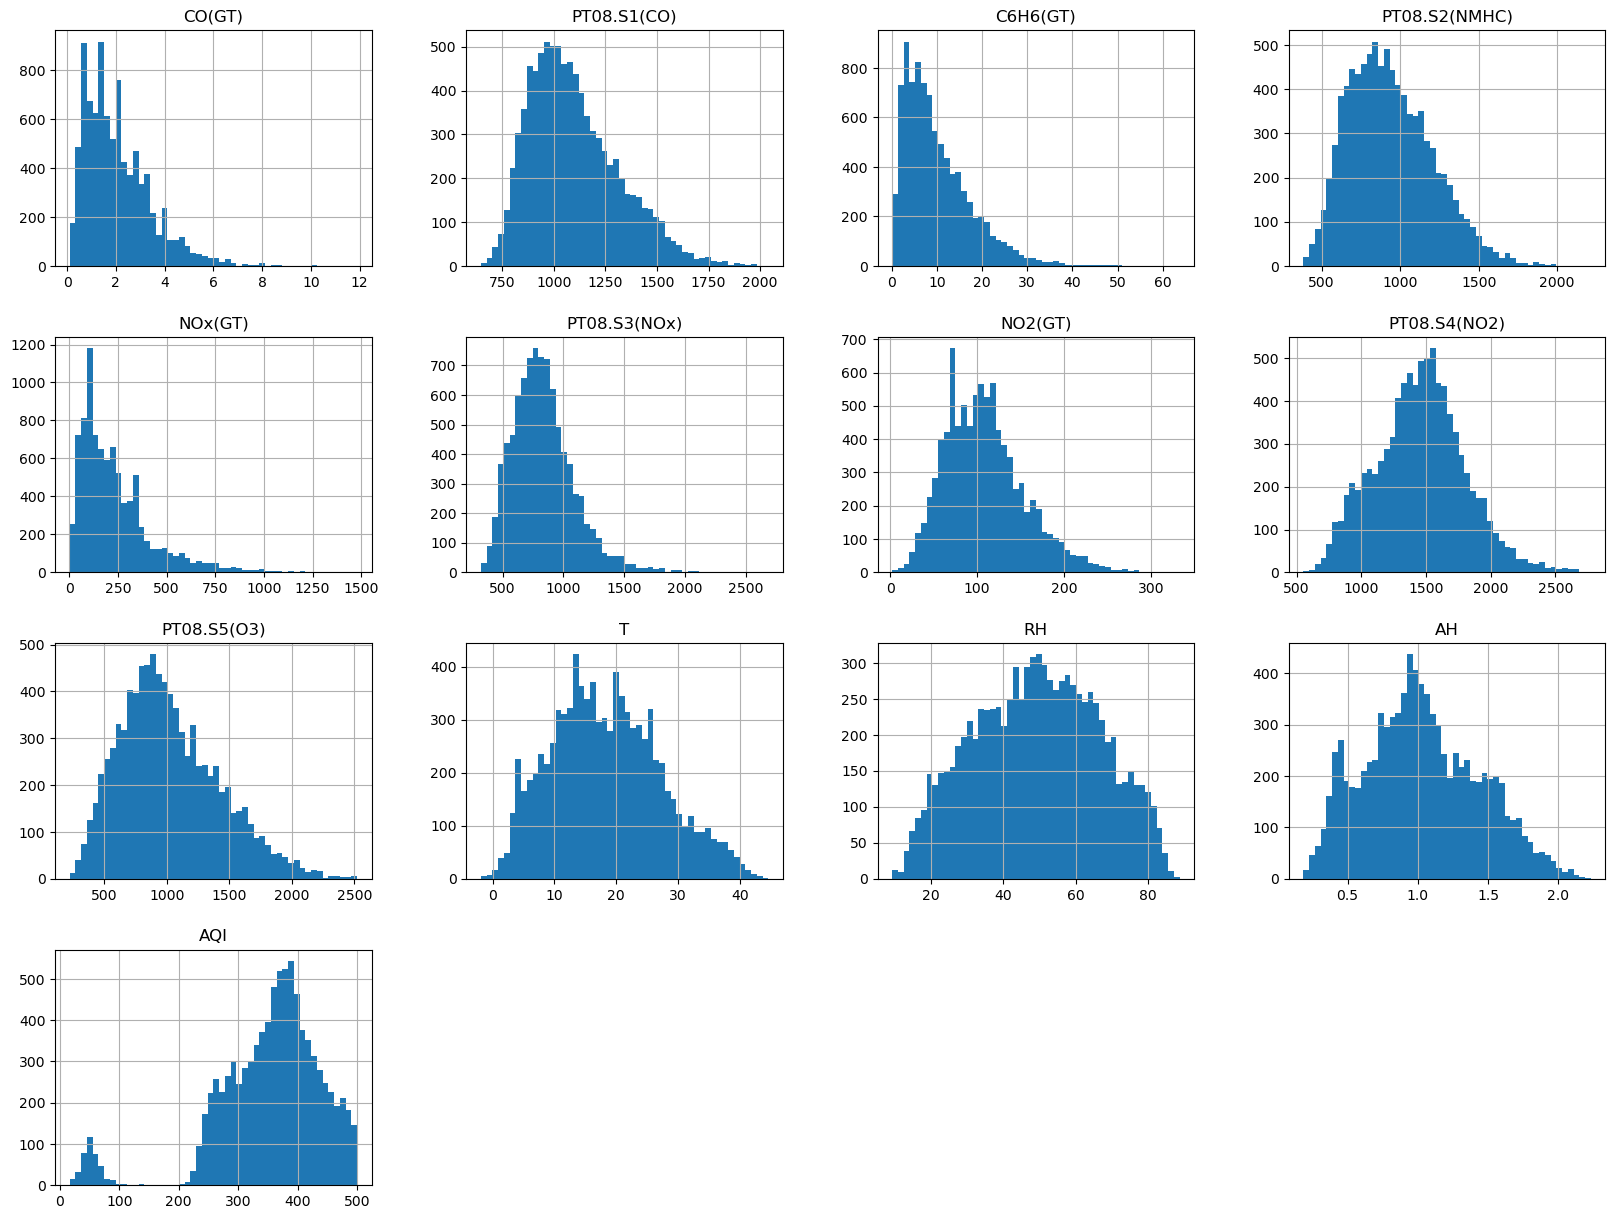

In [121]:
# Plot histograms for each attribute
df = df.drop(columns=['Hour','Month'])
df.hist(bins=50, figsize=(20,15))
plt.show()

# Time-series plots:

## Plot the hourly measurements of each air pollutant over time to identify any trends or patterns in the data. To understand the temporal variation in air pollution levels and identify any seasonal or daily patterns.

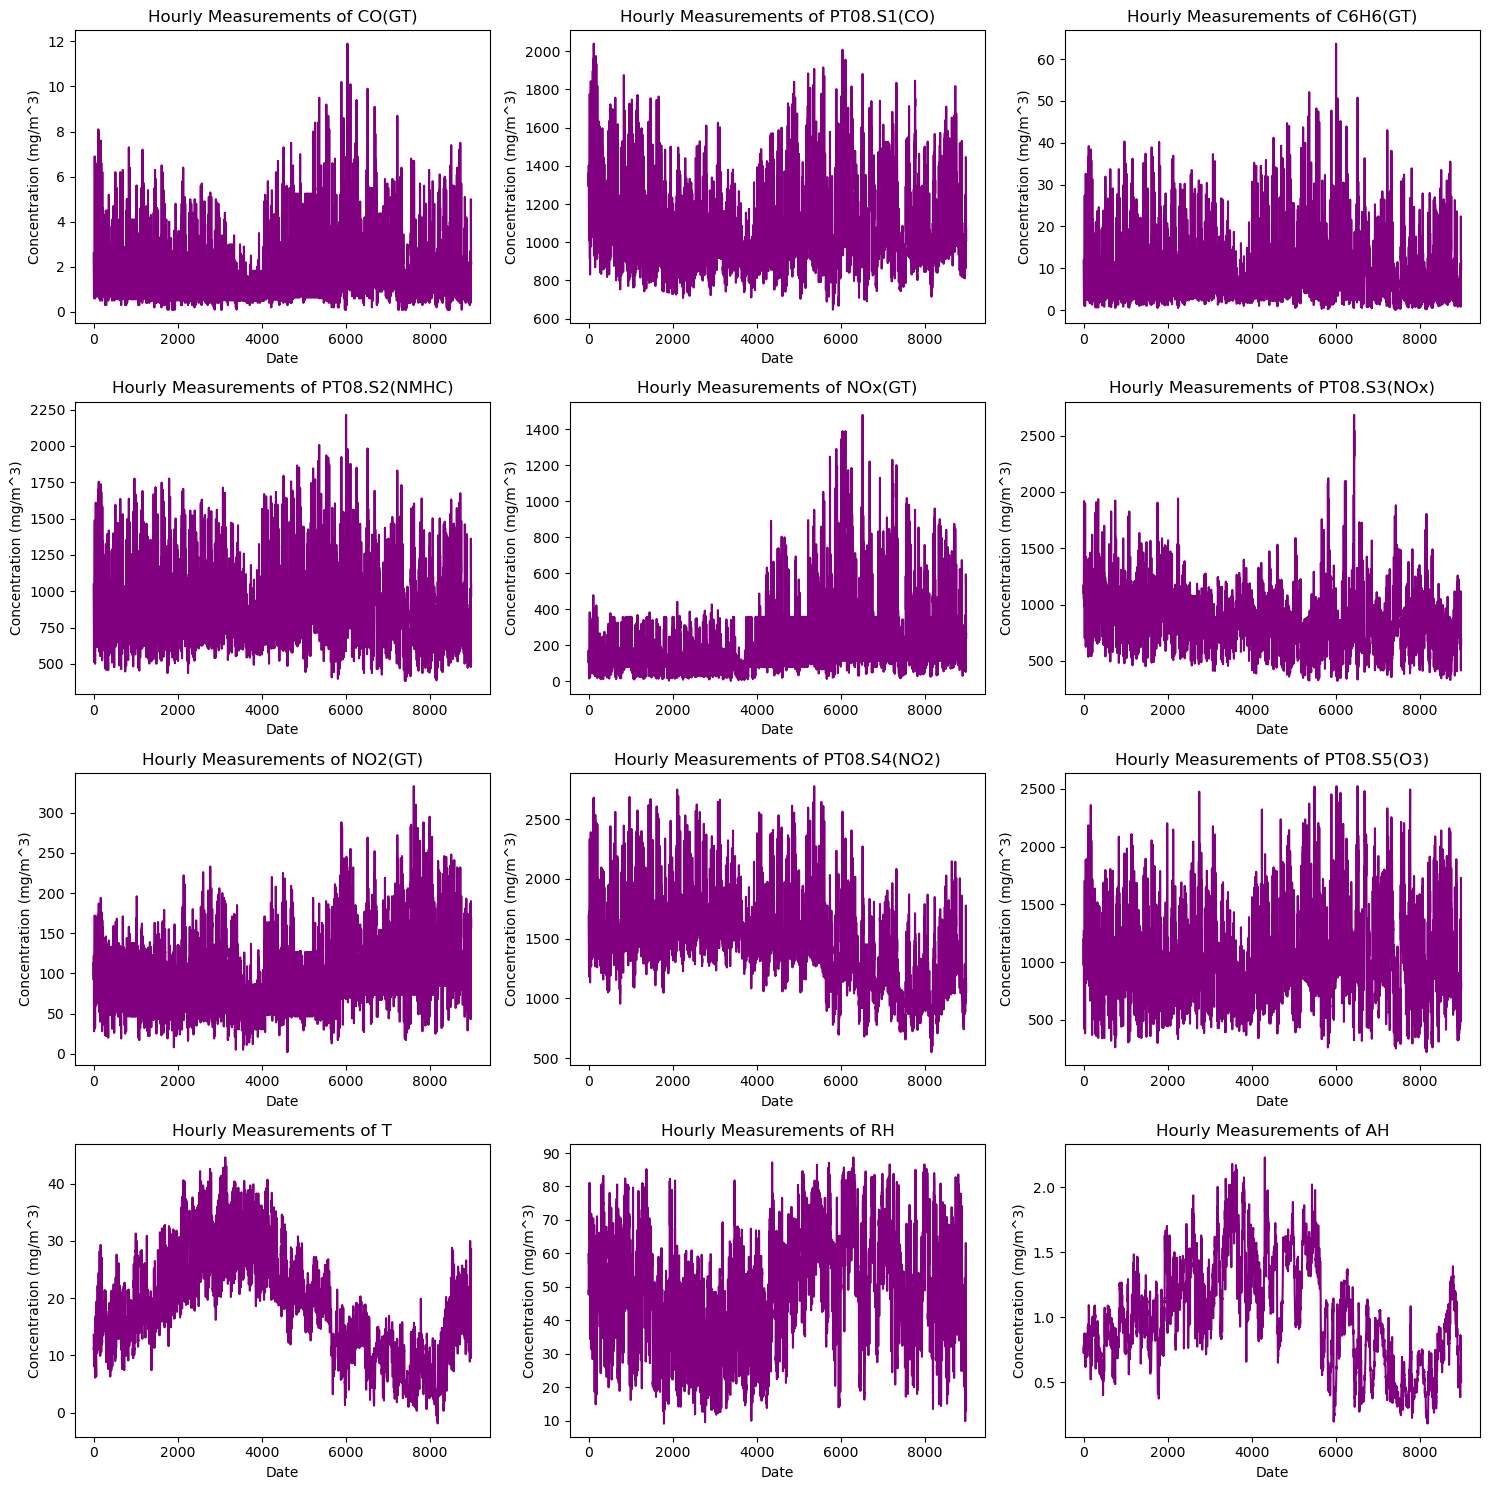

In [122]:
# Define a function to plot a time-series of a given pollutant
def plot_pollutant(ax, pollutant):
    ax.plot(df[pollutant], color="purple")
    ax.set_title("Hourly Measurements of " + pollutant)
    ax.set_xlabel("Date")
    ax.set_ylabel("Concentration (mg/m^3)")

# Create a figure with subplots for each pollutant
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

pollutants = ['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

# Call the plot_pollutant function for each pollutant in the dataset and plot it on a subplot
for i, pollutant in enumerate(pollutants):
    row = i // 3
    col = i % 3
    plot_pollutant(axs[row, col], pollutant)

# Add padding between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Box plots: 
### Plot box plots for each attribute to visualize the distribution of the data and identify any outliers or extreme values. To understand the spread of the data and identify any potential data quality issues.

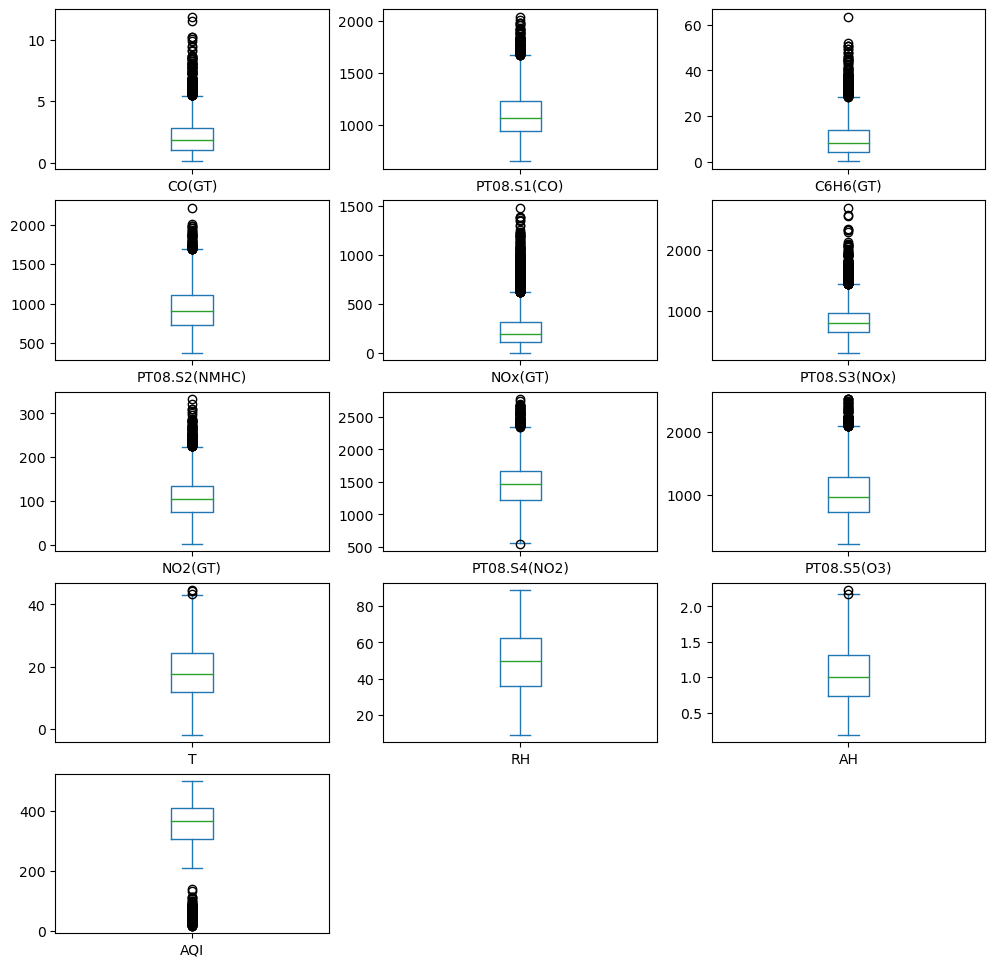

In [123]:
# Plot box plots for each attribute
df.plot(kind="box", subplots=True, layout=(5, 3), figsize=(12, 12))
plt.show()

## Correlation matrix: 
### Calculate the correlation coefficients between each pair of attributes in the dataset to understand the relationships between them. To identify any strong or weak correlations and understand which attributes may be important predictors of air quality.


<AxesSubplot:>

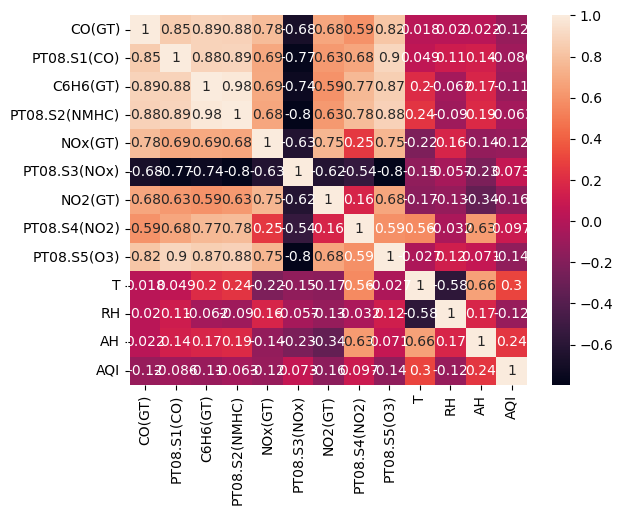

In [124]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)


This is a correlation matrix showing the correlation coefficients between different variables. Each cell in the matrix shows the correlation coefficient between two variables, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

Looking at the matrix, we can see that there are strong positive correlations between several variables such as CO(GT), C6H6(GT), PT08.S2(NMHC), PT08.S5(O3), and PT08.S4(NO2). On the other hand, there is a strong negative correlation between PT08.S3(NOx) and NOx(GT).

It's also worth noting that some variables have weak or no correlation with the other variables, such as T and RH with most other variables.

## Scatter plots: 
### Plot scatter plots between each pair of attributes to visualize the relationships between them. To identify any linear or nonlinear patterns and understand how different attributes may be related to each other.

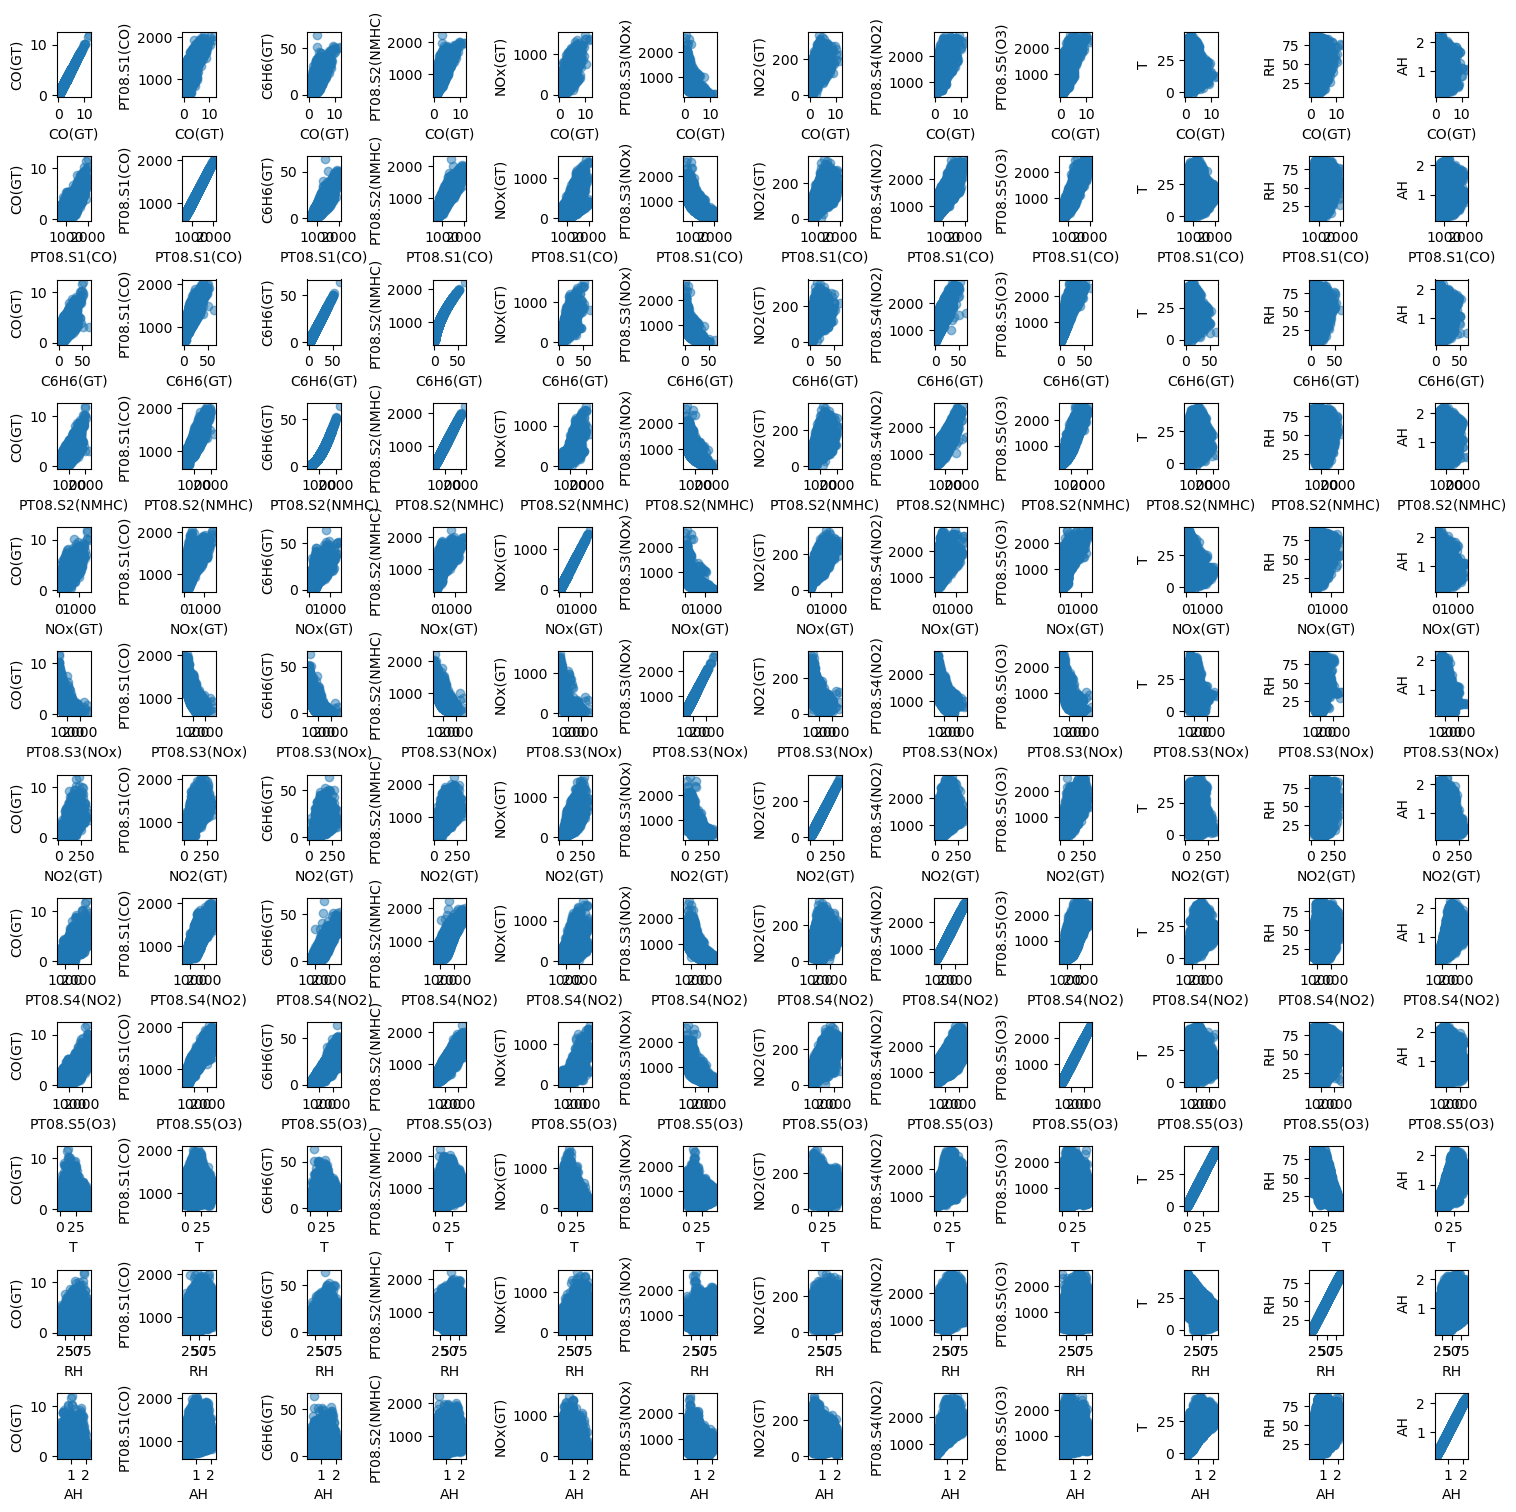

In [125]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=12, ncols=12, figsize=(15, 15))

# Loop through each pair of attributes and plot the scatter plot in its corresponding subplot
for i in range(12):
    for j in range(12):
        x_attr = df.columns[i+2]  # Get the name of the ith attribute
        y_attr = df.columns[j+2]  # Get the name of the jth attribute
        axes[i,j].scatter(df[x_attr], df[y_attr], alpha=0.5)
        axes[i,j].set_xlabel(x_attr)
        axes[i,j].set_ylabel(y_attr)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Heat maps: 
### Plot a heat map of the correlation matrix to visualize the correlations between attributes. To identify any clusters of strongly correlated attributes and understand which attributes may be important predictors of air quality.

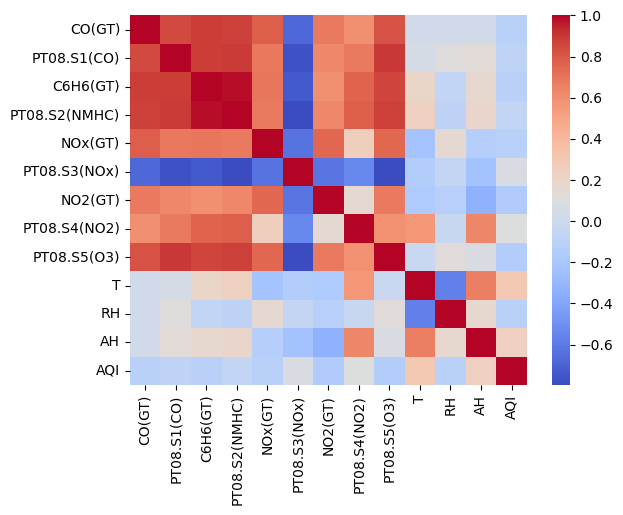

In [126]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show plot
plt.show()

## Pair plots: 
### Plot pair plots for each pair of attributes to visualize the relationships between them. To identify any linear or nonlinear patterns and understand how different attributes may be related to each other.

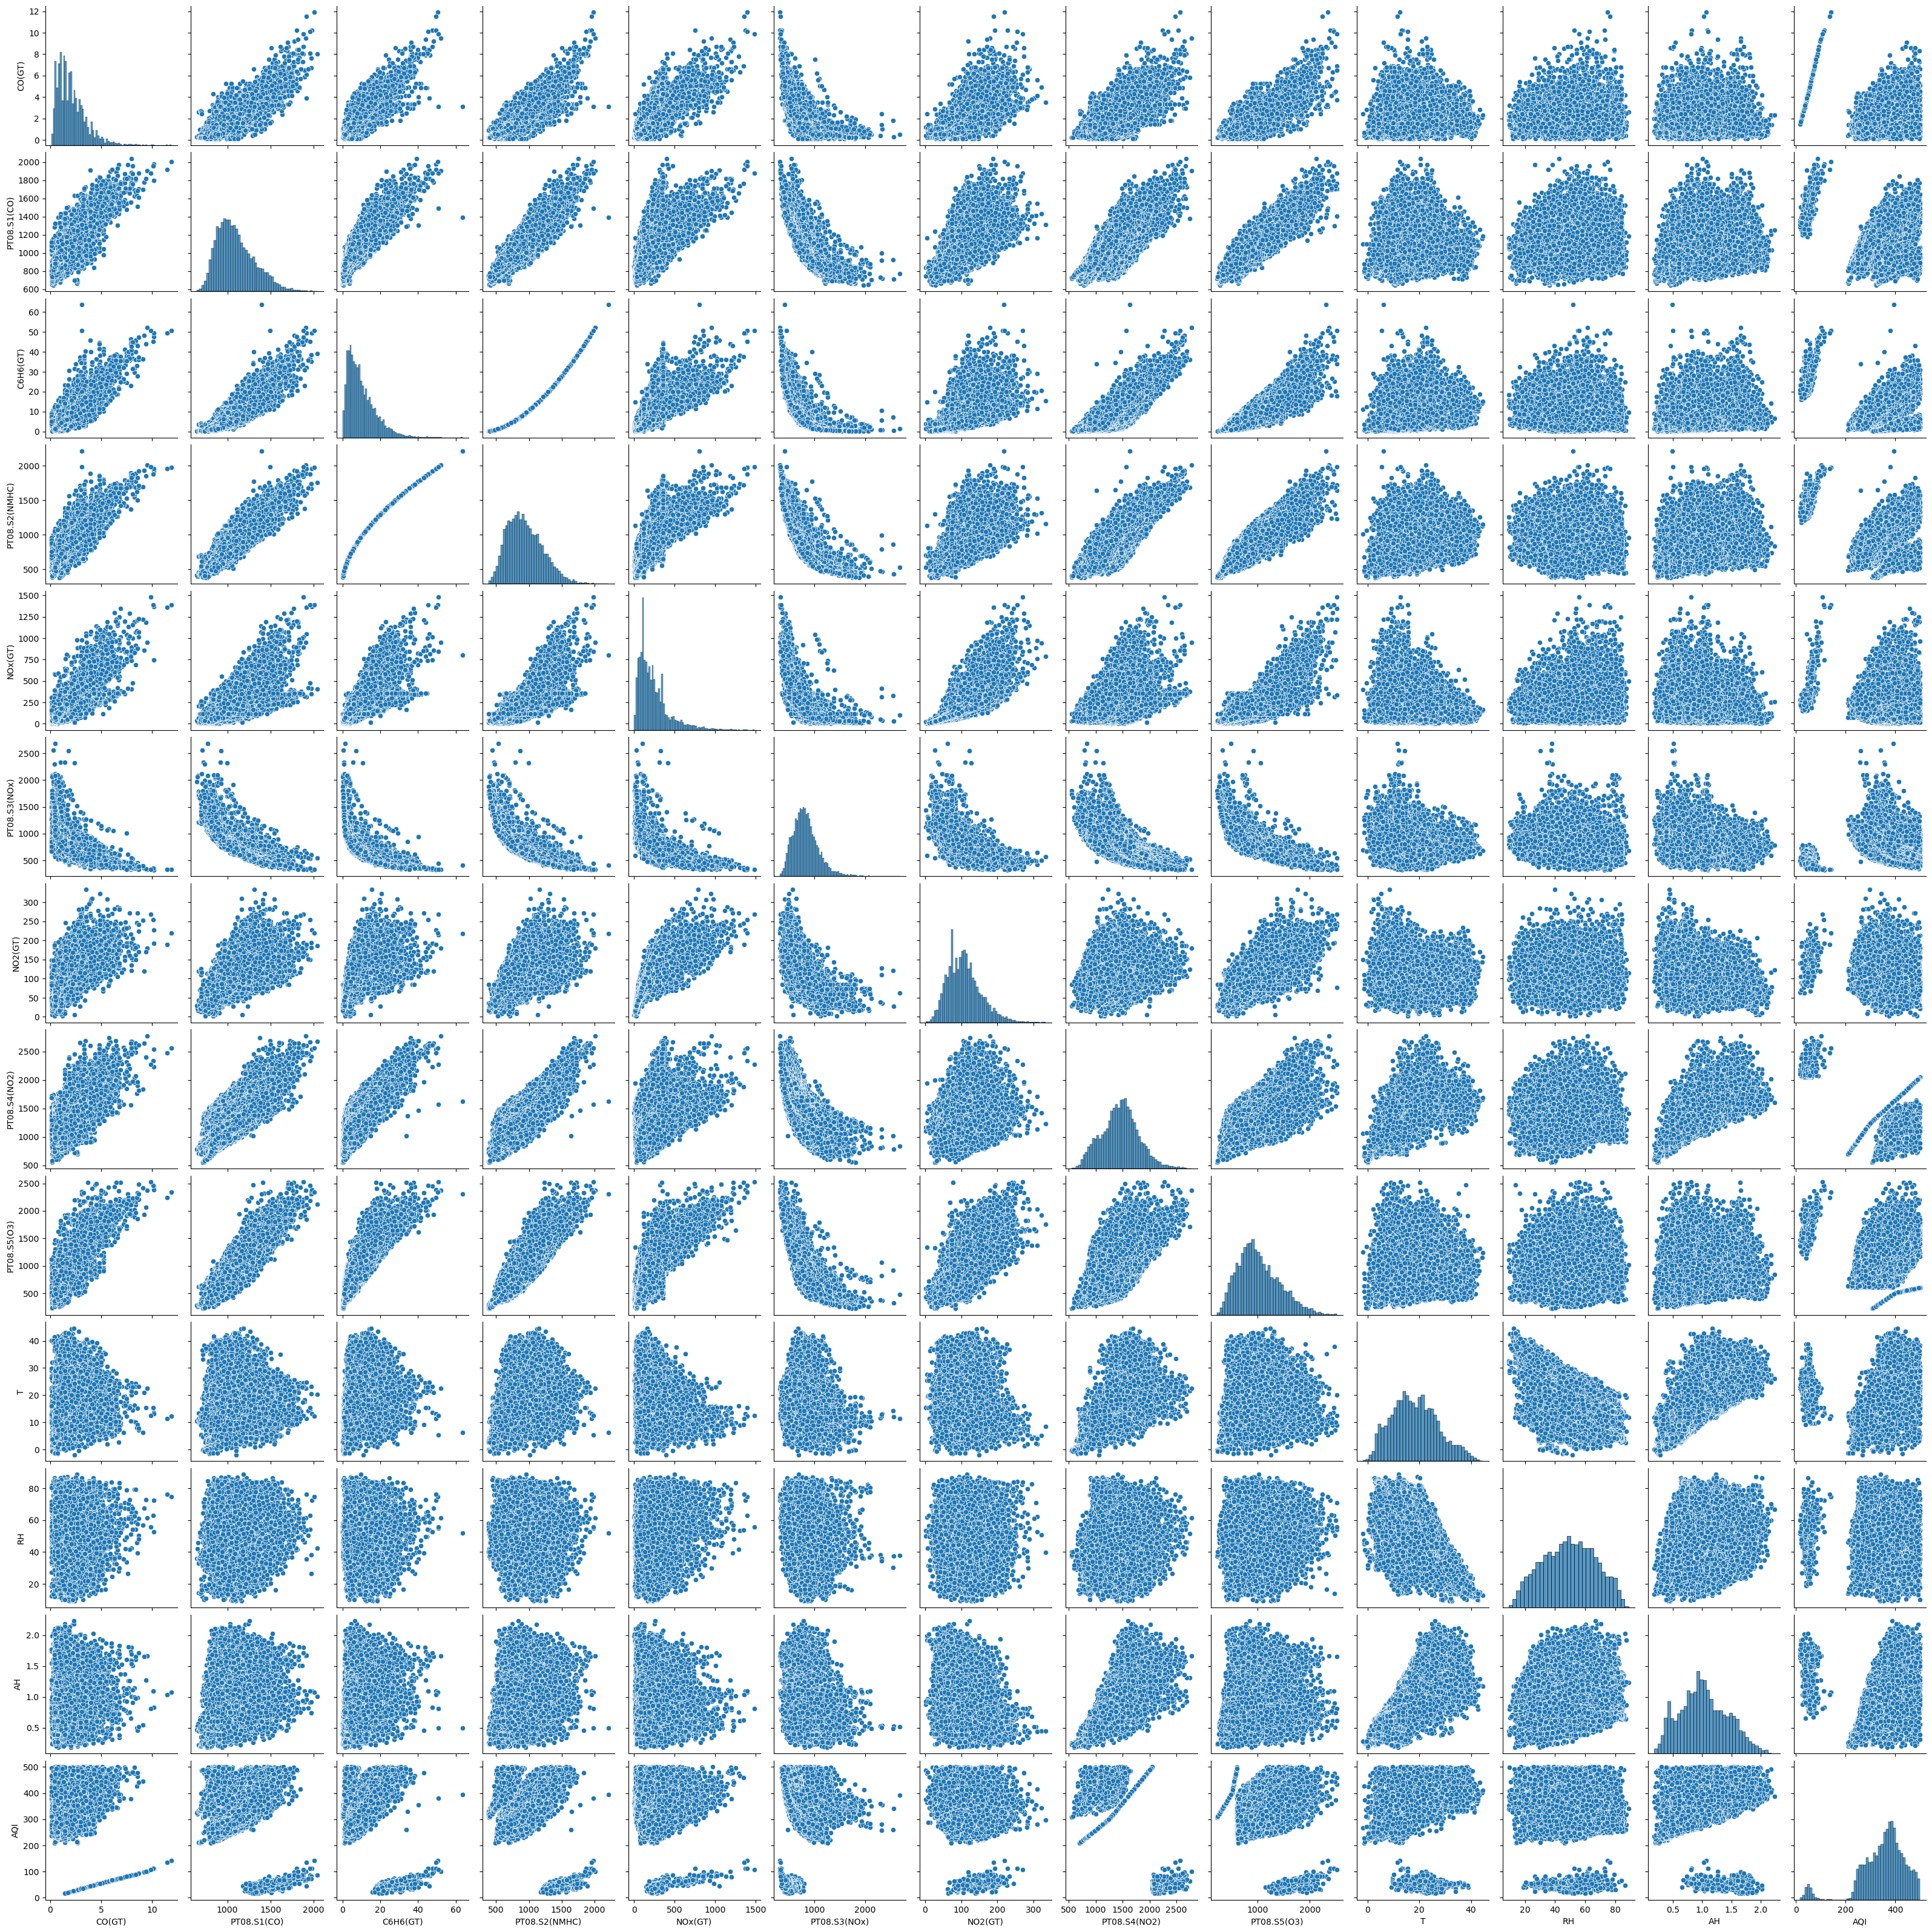

In [127]:
# Plot pair plots
sns.pairplot(df)

## Bar charts: 
### Plot bar charts for categorical attributes to visualize the frequency distribution of the data. To understand the distribution of categorical variables and identify any patterns or clusters in the data.

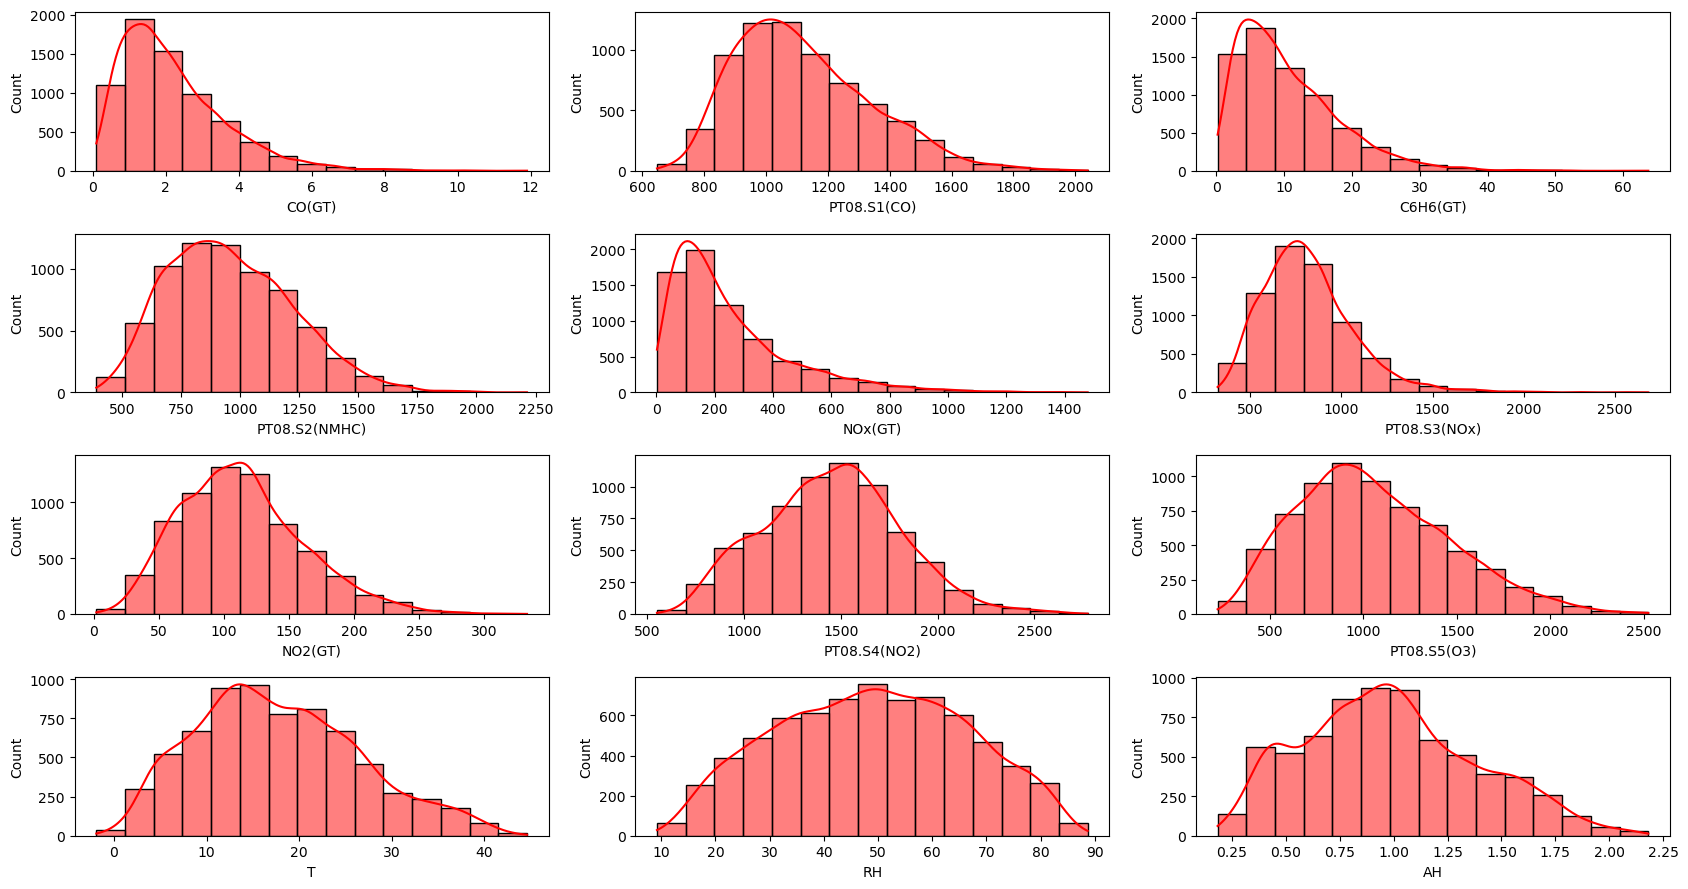

In [53]:
# Create a figure with 5 rows and 1 columns of subplots
fig, axs = plt.subplots(4, 3, figsize=(17, 9))

# Iterate through the columns of the DataFrame and plot a histogram on each subplot
for i, ax in zip(df.columns[2:14], axs.flatten()):
    sns.histplot(x=df[i], stat="count", color="red", bins=15, kde={'alpha':0.5}, ax=ax)
    ax.set_xlabel(i)
    
plt.tight_layout()
plt.show()

## Density plots: 
### Plot kernel density estimates for each attribute to visualize the distribution of the data. To understand the shape of the distribution and identify any potential data quality issues.

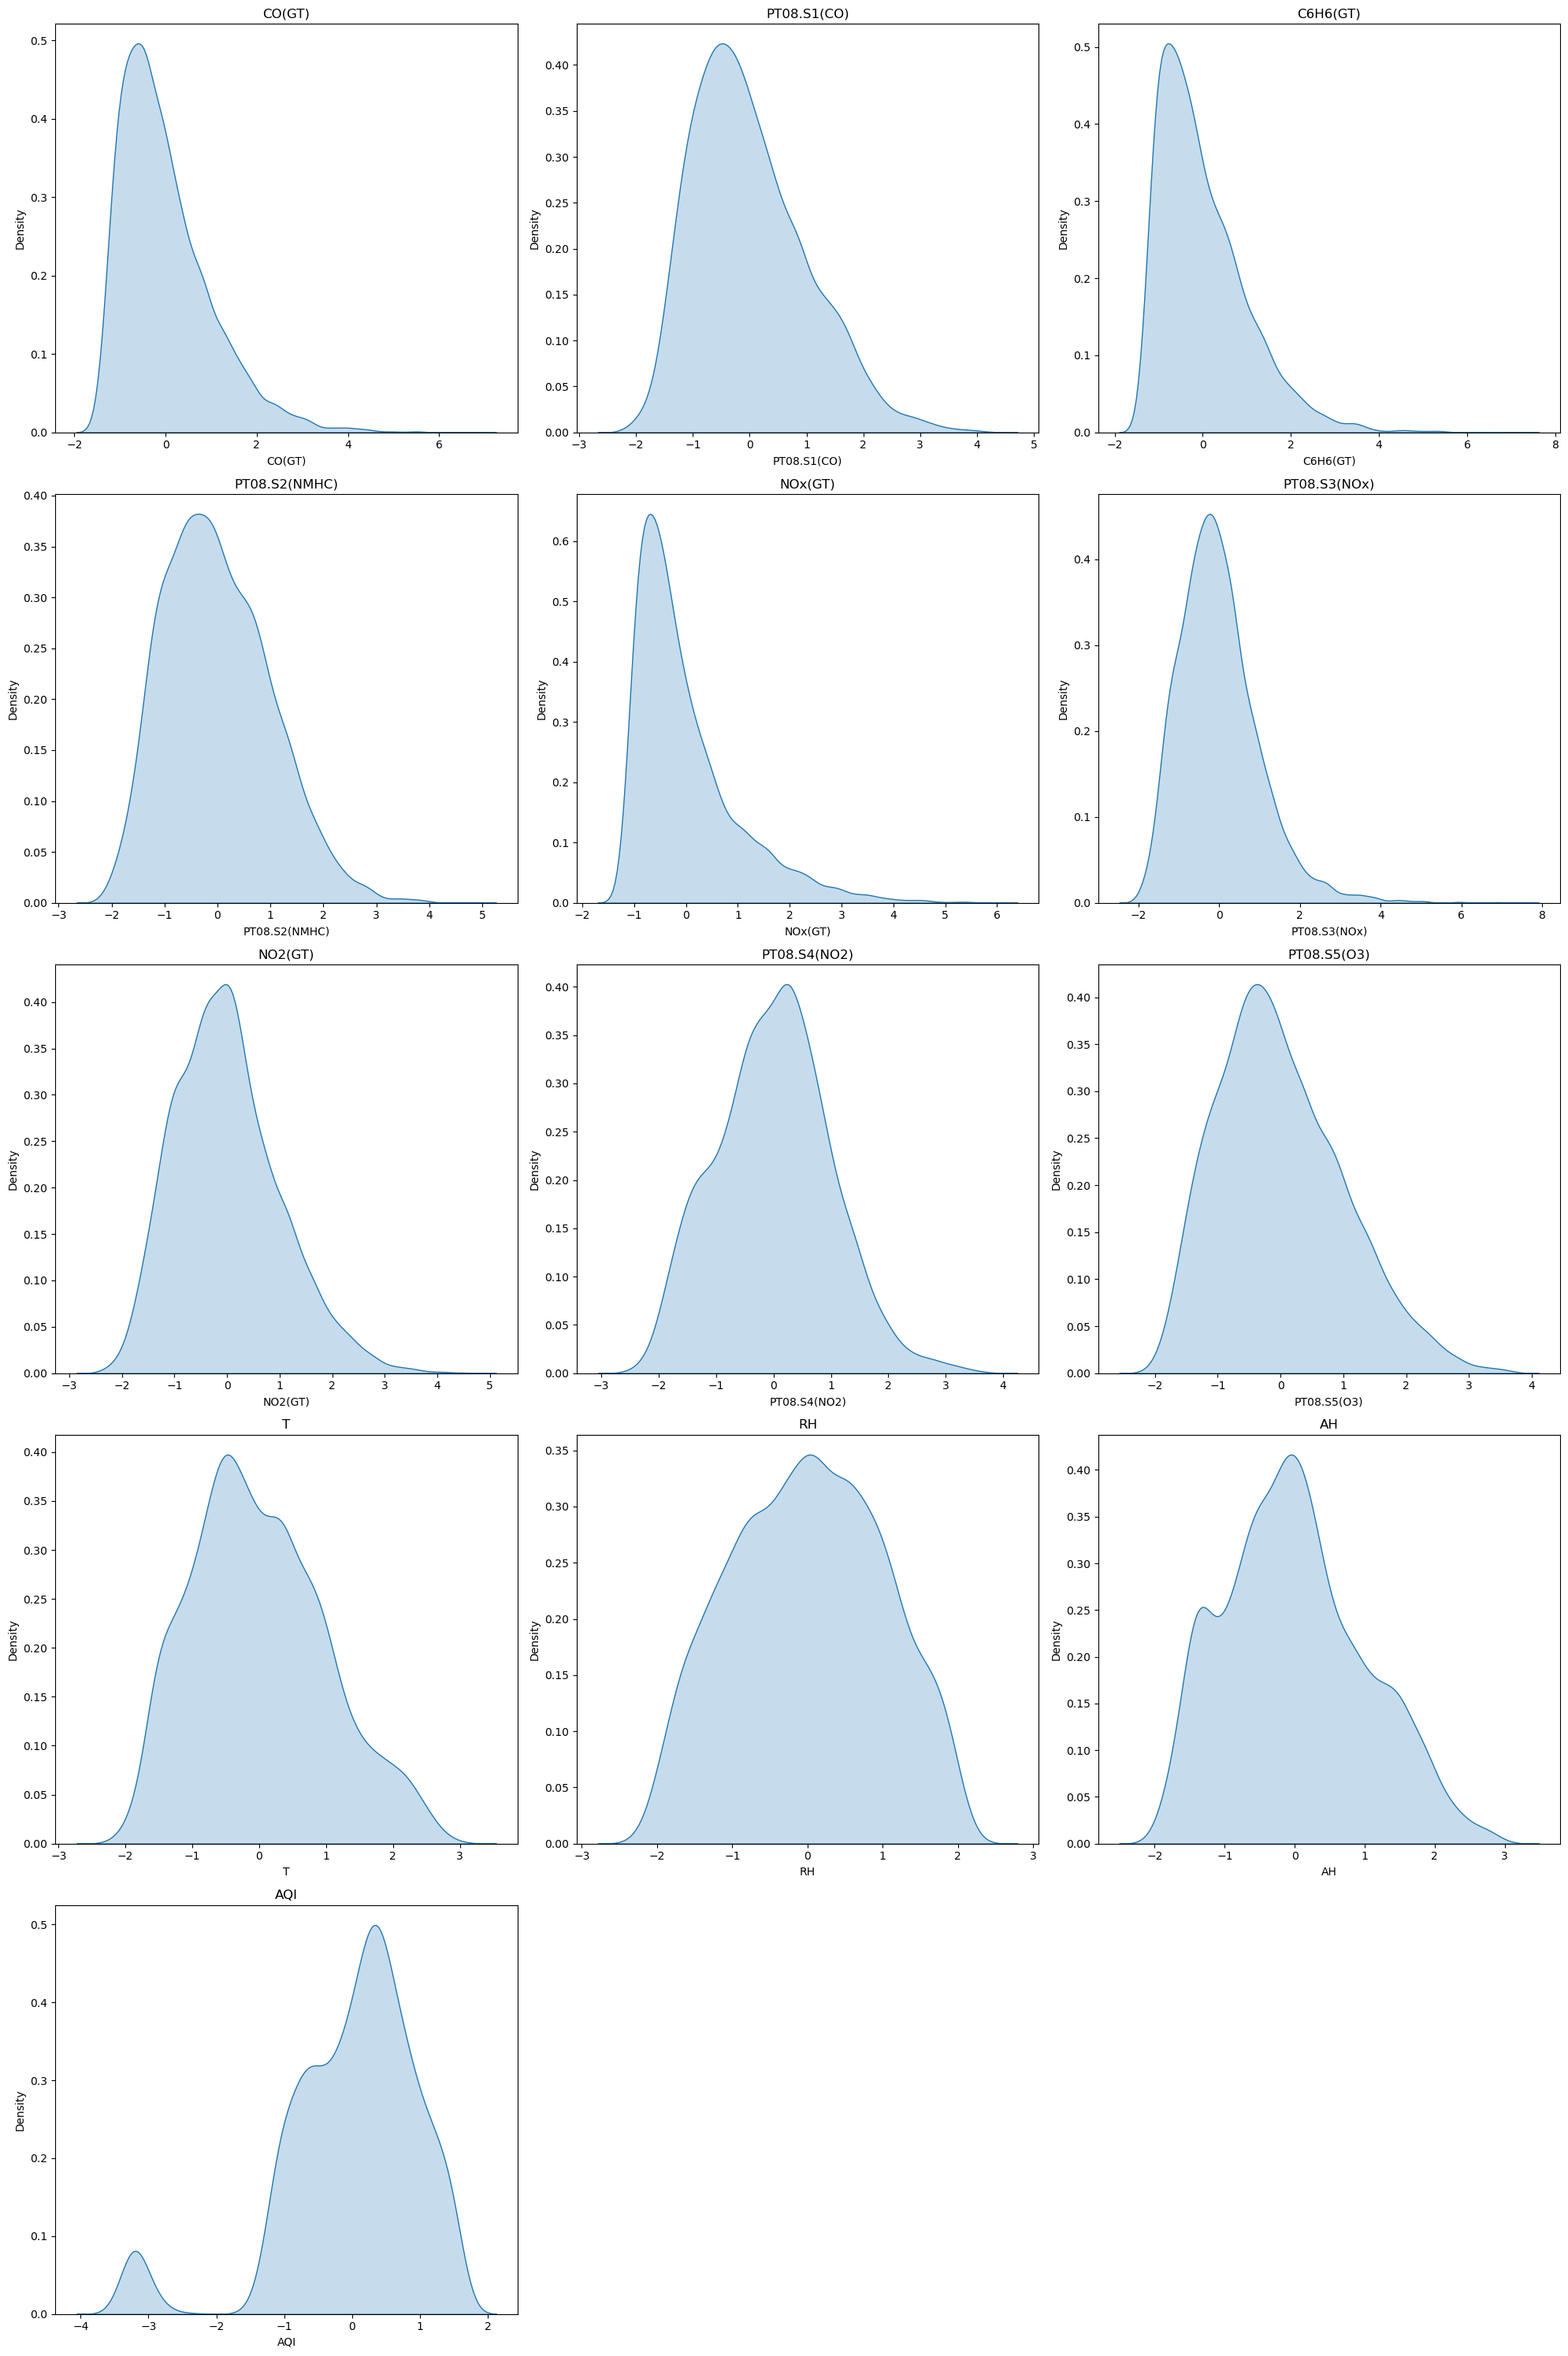

In [63]:
# Drop the first two columns as they are date and time
df = df.drop(columns=["Date", "Time", "DateTime"])


# Normalize the data
df_norm = (df - df.mean()) / df.std()

# Plot density plots for all attributes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))
for idx, ax in enumerate(axes.flatten()):
    if idx < len(df_norm.columns):
        sns.kdeplot(df_norm.iloc[:, idx], ax=ax, shade=True)
        ax.set_title(df_norm.columns[idx])
    else:
        ax.set_axis_off()

plt.tight_layout()
plt.show()